In [339]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#data reading
train = pd.read_csv(r'cs-training.csv').drop(['Unnamed: 0'],axis=1)
test = pd.read_csv(r'cs-test.csv').drop(['Unnamed: 0'],axis=1)

train.shape
test.shape

# removing Duplicates
train_redup = train.drop_duplicates()

# find missing percentage
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

train_redup.shape

findMiss(train_redup)


train_redup[train_redup.MonthlyIncome.isnull()].describe()

train_redup['NumberOfDependents'].agg(['mode'])

fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [375]:
x = train_redup.groupby('MonthlyIncome')['MonthlyIncome'].value_counts().reset_index().rename(columns={'count':'grouped_count'})
x[x['MonthlyIncome'] == x['grouped_count'].agg('max')]
x['MonthlyIncome'].agg(['mean','median'])

mean      10888.251361
median     7559.500000
Name: MonthlyIncome, dtype: float64

In [445]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

findMiss(fam_miss)
findMiss(fam_nmiss)

fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])
#fill missing values with median
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

mean      6452.661452
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [392]:
findMiss(fam_nmiss)
filled_train =  pd.concat([fam_nmiss,fam_miss], axis=0)
filled_train.columns
findMiss(filled_train)

#find correlation
filled_train.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001818,-0.115721,0.131517,-0.007719,-0.016334,-0.030535,0.122495,-0.007631,0.106257,0.046538
RevolvingUtilizationOfUnsecuredLines,-0.001818,1.000000,-0.005940,-0.001290,0.003946,0.006271,-0.011445,-0.001012,0.006163,-0.000997,0.001134
age,-0.115721,-0.005940,1.000000,-0.055190,0.024191,0.021730,0.147023,-0.052953,0.032699,-0.048733,-0.217500
NumberOfTime30-59DaysPastDueNotWorse,0.131517,-0.001290,-0.055190,1.000000,-0.005912,-0.008850,-0.048779,0.980489,-0.027009,0.984535,-0.000299
DebtRatio,-0.007719,0.003946,0.024191,-0.005912,1.000000,-0.022007,0.048814,-0.007823,0.119618,-0.006963,-0.044983
MonthlyIncome,-0.016334,0.006271,0.021730,-0.008850,-0.022007,1.000000,0.092029,-0.011380,0.119555,-0.010033,0.072943
NumberOfOpenCreditLinesAndLoans,-0.030535,-0.011445,0.147023,-0.048779,0.048814,0.092029,1.000000,-0.075569,0.431410,-0.065805,0.070753
NumberOfTimes90DaysLate,0.122495,-0.001012,-0.052953,0.980489,-0.007823,-0.011380,-0.075569,1.000000,-0.042856,0.991409,-0.008209
NumberRealEstateLoansOrLines,-0.007631,0.006163,0.032699,-0.027009,0.119618,0.119555,0.431410,-0.042856,1.000000,-0.036856,0.127300
NumberOfTime60-89DaysPastDueNotWorse,0.106257,-0.000997,-0.048733,0.984535,-0.006963,-0.010033,-0.065805,0.991409,-0.036856,1.000000,-0.008975


In [441]:
# percentage of default value

filled_train['SeriousDlqin2yrs'].size/filled_train.shape[0]

#RevolvingUtilizationOfUnsecuredLines liberties/assest 
# removing outlier which greater than 10

filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].describe()

#filled_train.columns
util_droped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [329]:
# Analysis PastDueDate

util_droped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

util_droped.groupby(['NumberOfTimes90DaysLate']).size()

util_droped[util_droped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

c:\users\anand\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


SeriousDlqin2yrs
0    138778
1      9990
dtype: int64

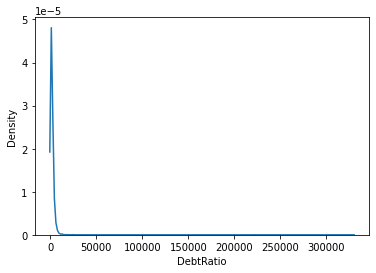

In [398]:
# EDA on DebitRatio Analysis

util_droped['DebtRatio'].describe()

sns.kdeplot(util_droped['DebtRatio'])

In [ ]:
# Checking outlier in Quantile value spikes after .975
# So removing outlier on DebitRatio

util_droped['DebtRatio'].quantile([.975])

util_droped[util_droped['DebtRatio']>3492][['SeriousDlqin2yrs','MonthlyIncome']].describe()

temp = util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])]

dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])].index)

dRatio.groupby(['SeriousDlqin2yrs']).size()

In [437]:
# Handling imbalance Dataset
# Non default customer count is higher than defaulter

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE()

independent = dRatio.drop(['SeriousDlqin2yrs'],axis=1)
dependent = dRatio['SeriousDlqin2yrs']

X_smote, Y_smote = smote.fit_resample(independent, dependent)
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.30, random_state=True)


In [438]:
# implementing Machine learnig Algorithm

model = XGBClassifier(tree_method = 'exact')

# using data from smote because of data imbalanced

# x = dRatio.drop(['SeriousDlqin2yrs'],axis=1)
# y = dRatio['SeriousDlqin2yrs']

x,y = X_train, y_train

model.fit(x,y.values.ravel())
y_pred = model.predict(x)

# check Accuracy score
accuracy_score(y,y_pred)

cm = confusion_matrix(y,y_pred)


Text(33.0, 0.5, 'actuals')

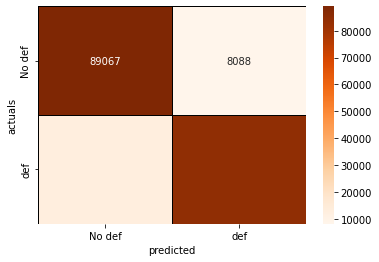

In [439]:
# Data Visual Representation

sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [440]:
#Compare with actual data

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     97155
           1       0.91      0.87      0.89     97134

    accuracy                           0.89    194289
   macro avg       0.89      0.89      0.89    194289
weighted avg       0.89      0.89      0.89    194289

